In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

ROLLMIN,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
ROLLMAX,,,,,,,,,,,,,,,,,,,,
10,-0.551532,-0.381981,-0.330223,-0.341074,-0.171183,-0.316174,-0.198329,-0.353517,-0.359877,-0.212968,-0.179419,0.071345,0.036747,0.036747,0.036747,0.057372,-0.021612,0.149828,0.139559,0.139559
20,-0.376040,-0.135652,-0.133306,-0.117242,-0.122887,-0.276340,-0.097512,-0.272217,-0.279383,-0.113539,-0.075754,-0.052659,-0.083250,-0.083250,-0.083250,-0.040337,-0.112028,0.054162,0.054162,0.054162
30,-0.145602,0.334812,0.640384,0.514431,0.323131,0.091652,0.248779,0.007037,-0.002877,-0.061819,-0.010293,0.015705,-0.017096,-0.017096,-0.017096,0.028916,-0.047951,0.152944,0.152944,0.152944
40,-0.194639,0.066639,0.288591,0.215350,0.082807,-0.106625,0.060632,-0.144685,-0.153108,-0.203171,-0.150310,-0.064774,-0.094975,-0.094975,-0.094975,-0.115628,-0.181694,0.123857,0.123857,0.123857
50,-0.207447,0.075994,0.323461,0.304809,0.162509,-0.040868,0.138703,-0.081730,-0.090771,-0.144522,-0.074993,0.018125,-0.014752,-0.014752,-0.014752,-0.037236,-0.109158,0.223478,0.223478,0.223478
60,-0.044386,0.397448,0.790961,0.805698,0.792647,0.492418,0.889916,0.740746,0.740746,0.649778,0.591127,0.523555,0.474349,0.474349,0.474349,0.440705,0.333082,0.533656,0.533656,0.533656
70,0.201871,0.757552,1.141396,1.159008,1.143417,0.784437,1.259710,1.081354,1.081354,0.972590,0.902466,0.821665,0.762834,0.762834,0.762834,0.722607,0.593923,0.841056,0.841056,0.841056
80,0.188652,0.673778,1.039323,1.083955,1.068913,0.722406,1.181154,1.008998,1.008998,0.904017,0.836326,0.758342,0.701556,0.701556,0.701556,0.662726,0.538519,0.777061,0.777061,0.777061
90,0.117563,0.573673,0.917355,0.959313,0.945168,0.619386,1.050701,0.888841,0.888841,0.790137,0.726501,0.653176,0.599788,0.599788,0.599788,0.563281,0.446500,0.694660,0.694660,0.694660


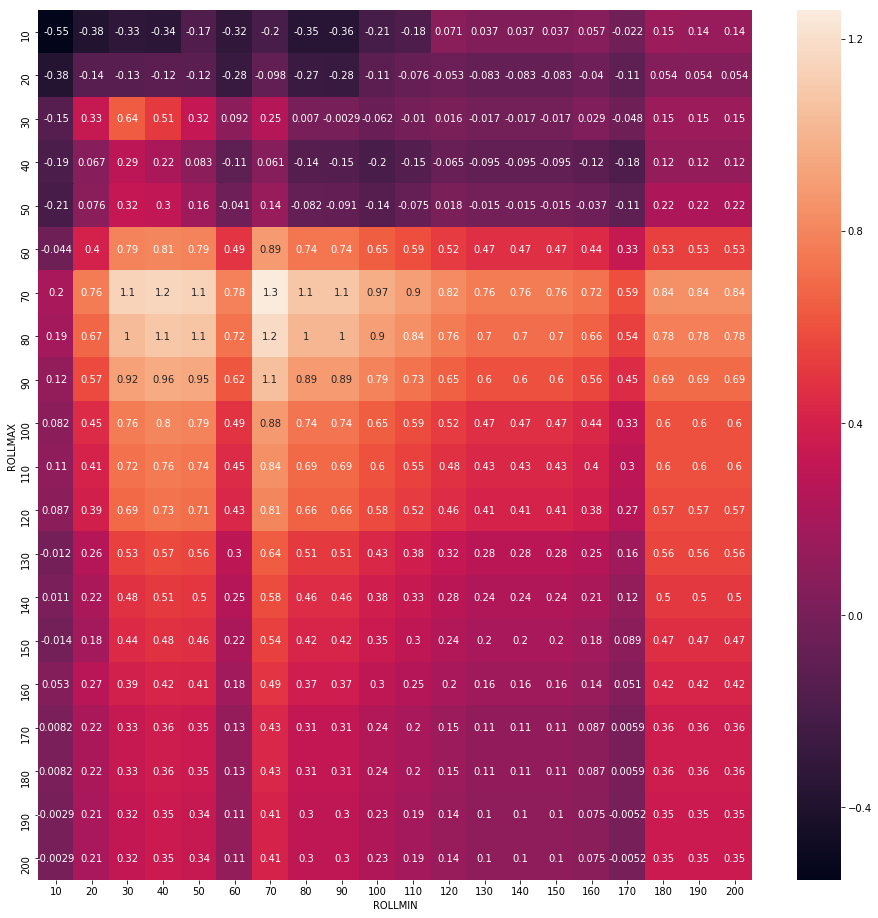

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

# uniform_data = np.random.rand(10, 10)
# ax = sns.heatmap(uniform_data, annot=True)

400

,START,END,TURTLE_POS,ROLLMAX,ROLLMIN,ORDER,STOCK,RETURN,MAXDROPDOWN,WINRATE,annual_return,annual_volatility,calmar_ratio,sharpe_ratio,alpha,beta,ALL_DAYS,FREECASH_DAY,BENCHMARK_RETURN
0,2011-01-19,2019-02-27,1,10,10,60,1,0.640053,-0.367338,0.433333,0.065468,0.159422,0.178222,0.478223,0.055284,0.435172,1966,0,0.154751
1,2011-01-19,2019-02-27,1,10,20,44,1,0.363650,-0.363455,0.386364,0.040557,0.179134,0.111589,0.312134,0.029344,0.551772,1966,0,0.154751
2,2011-01-19,2019-02-27,1,10,30,38,1,0.153377,-0.427222,0.368421,0.018459,0.187421,0.043206,0.191939,0.006995,0.601802,1966,0,0.154751
3,2011-01-19,2019-02-27,1,10,40,32,1,0.145984,-0.430067,0.343750,0.017620,0.189651,0.040969,0.187512,0.005787,0.618344,1966,0,0.154751
4,2011-01-19,2019-02-27,1,10,50,27,1,0.281887,-0.411505,0.370370,0.032343,0.192535,0.078597,0.262218,0.019920,0.634765,1966,0,0.154751


,TURTLE_POS,ROLLMAX,ROLLMIN,ORDER,STOCK,RETURN,MAXDROPDOWN,WINRATE,annual_return,annual_volatility,calmar_ratio,sharpe_ratio,alpha,beta,ALL_DAYS,FREECASH_DAY,BENCHMARK_RETURN
count,400.0,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.0,4.000000e+02
mean,1.0,105.000000,105.000000,8.310000,1.0,0.315426,-0.388435,0.496628,0.032110,0.162613,0.149029,0.327477,0.022226,0.473838,1966.0,0.0,1.547511e-01
std,0.0,57.735027,57.735027,6.928485,0.0,0.334147,0.126113,0.147487,0.033315,0.034617,0.238340,0.258307,0.035381,0.186993,0.0,0.0,1.167194e-15
min,1.0,10.000000,10.000000,3.000000,1.0,-0.254028,-0.593849,0.150000,-0.036868,0.085341,-0.070709,-0.084480,-0.050851,0.125532,1966.0,0.0,1.547511e-01
25%,1.0,57.500000,57.500000,4.000000,1.0,0.053572,-0.465366,0.400000,0.006712,0.131726,0.014533,0.133703,-0.004764,0.298563,1966.0,0.0,1.547511e-01
50%,1.0,105.000000,105.000000,6.000000,1.0,0.250503,-0.441217,0.500000,0.029068,0.170959,0.067297,0.255774,0.019504,0.501995,1966.0,0.0,1.547511e-01
75%,1.0,152.500000,152.500000,10.000000,1.0,0.570359,-0.303362,0.666667,0.059554,0.193097,0.185397,0.499506,0.052846,0.636853,1966.0,0.0,1.547511e-01
max,1.0,200.000000,200.000000,60.000000,1.0,1.174153,-0.070391,0.818182,0.104672,0.223457,1.340522,1.034811,0.094883,0.854891,1966.0,0.0,1.547511e-01


ROLLMIN,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
ROLLMAX,,,,,,,,,,,,,,,,,,,,
10,0.640053,0.363650,0.153377,0.145984,0.281887,0.114929,-0.011632,-0.017393,0.126508,0.110510,0.082210,-0.154674,-0.127532,-0.096687,-0.117261,-0.101562,-0.121966,-0.015595,0.011096,0.011096
20,1.142777,0.629424,0.346960,0.363711,0.533632,0.361275,0.217515,0.222589,0.154660,0.054207,0.026137,-0.197028,-0.139173,-0.113000,-0.129343,-0.097023,-0.124135,0.013572,0.002694,0.002694
30,0.853821,0.434487,0.215546,0.293135,0.406284,0.256316,0.122138,0.139449,0.076615,-0.015682,-0.045806,-0.254028,-0.190893,-0.152125,-0.166237,-0.174159,-0.198470,-0.048323,-0.057616,-0.057616
40,0.797244,0.542284,0.275563,0.427233,0.529218,0.373396,0.247439,0.315899,0.244887,0.140809,0.111273,-0.134440,-0.055017,-0.080114,-0.104201,-0.114259,-0.128648,0.095377,0.082787,0.082787
50,0.628114,0.454941,0.246633,0.446040,0.569865,0.424823,0.304671,0.396126,0.311919,0.189742,0.159189,-0.085746,-0.021582,-0.029846,-0.063398,-0.073011,-0.091558,0.108210,0.093824,0.093824
60,0.722333,0.522171,0.362665,0.610011,0.743829,0.446826,0.341407,0.287709,0.217705,0.110185,0.087112,-0.155057,-0.056043,-0.073587,-0.091272,-0.099554,-0.122845,0.086058,0.073468,0.073468
70,0.780400,0.567118,0.382303,0.677984,0.893072,0.571839,0.353712,0.313565,0.225314,0.143521,0.130625,-0.111283,-0.116186,-0.122638,-0.154550,-0.162112,-0.179613,0.021922,0.009799,0.009799
80,0.875542,0.569404,0.417859,0.795586,0.810353,0.520972,0.298562,0.248756,0.179677,0.104535,0.091742,-0.142436,-0.147133,-0.153013,-0.186152,-0.193354,-0.210562,-0.013917,-0.025575,-0.025575
90,0.984593,0.694084,0.528281,0.929431,0.923131,0.594397,0.507068,0.456692,0.367575,0.330300,0.317011,0.039390,0.035337,0.018975,-0.009698,-0.019061,-0.047330,-0.088924,-0.100115,-0.100115


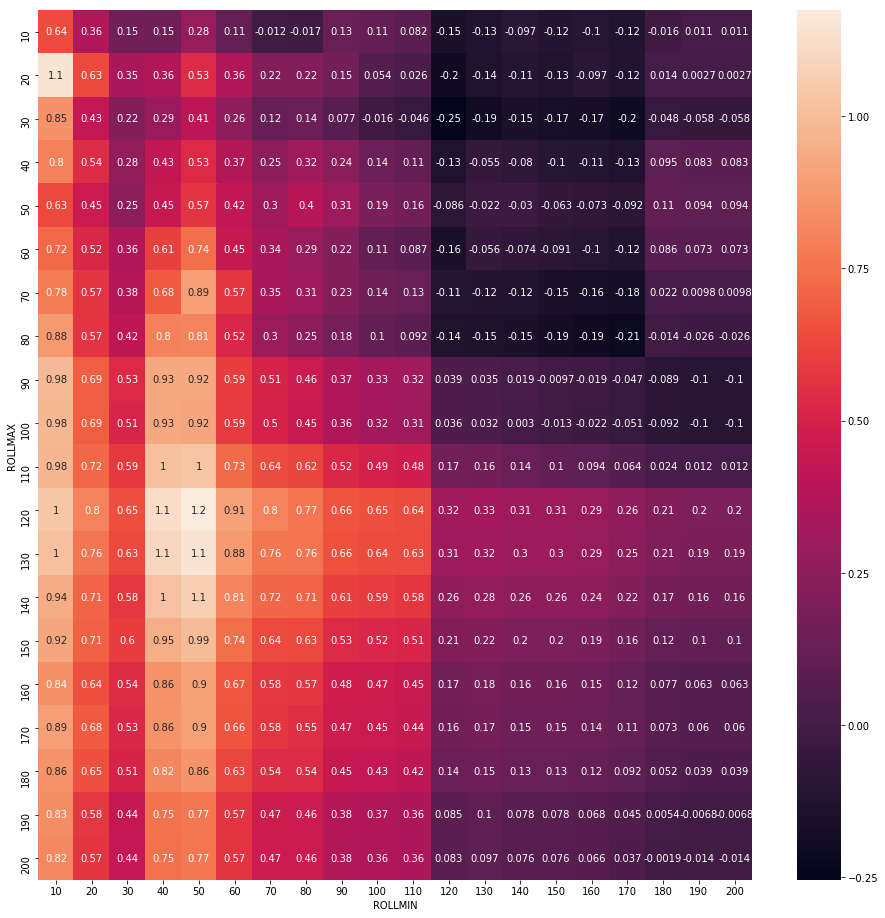

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2011-2019-399300-TT-PARAMTEST-20190227.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

324

,START,END,TURTLE_POS,ROLLMAX,ROLLMIN,ORDER,STOCK,RETURN,MAXDROPDOWN,WINRATE,annual_return,annual_volatility,calmar_ratio,sharpe_ratio,alpha,beta,ALL_DAYS,FREECASH_DAY,BENCHMARK_RETURN
0,2005-01-01,2019-03-01,1,10,10,96,1,5.621283,-0.417611,0.437500,0.160673,0.207456,0.384743,0.822946,0.098970,0.458100,3197,0,2.9981
1,2005-01-01,2019-03-01,1,10,20,66,1,4.770989,-0.483409,0.424242,0.148166,0.233707,0.306502,0.709128,0.074676,0.581299,3197,0,2.9981
2,2005-01-01,2019-03-01,1,10,30,52,1,5.678778,-0.513346,0.365385,0.161464,0.247100,0.314533,0.730345,0.078827,0.648905,3197,0,2.9981
3,2005-01-01,2019-03-01,1,10,40,44,1,4.899149,-0.571910,0.363636,0.150156,0.252239,0.262551,0.681787,0.066013,0.676481,3197,0,2.9981
4,2005-01-01,2019-03-01,1,10,50,39,1,5.303646,-0.571910,0.384615,0.156184,0.254366,0.273092,0.698778,0.069971,0.688062,3197,0,2.9981


,TURTLE_POS,ROLLMAX,ROLLMIN,ORDER,STOCK,RETURN,MAXDROPDOWN,WINRATE,annual_return,annual_volatility,calmar_ratio,sharpe_ratio,alpha,beta,ALL_DAYS,FREECASH_DAY,BENCHMARK_RETURN
count,324.0,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.0,324.0,3.240000e+02
mean,1.0,95.000000,95.000000,13.969136,1.0,6.561057,-0.432164,0.579770,0.169021,0.216275,0.436142,0.855090,0.100419,0.508317,3197.0,0.0,2.998100e+00
std,0.0,51.961524,51.961524,11.071355,0.0,2.234592,0.112803,0.122781,0.028232,0.032269,0.185673,0.179647,0.034010,0.142656,0.0,0.0,9.785075e-15
min,1.0,10.000000,10.000000,6.000000,1.0,2.269797,-0.638175,0.230769,0.097884,0.135271,0.163139,0.498864,0.010011,0.194809,3197.0,0.0,2.998100e+00
25%,1.0,50.000000,50.000000,8.000000,1.0,4.827813,-0.521892,0.542224,0.149053,0.195600,0.294072,0.704069,0.073771,0.407073,3197.0,0.0,2.998100e+00
50%,1.0,95.000000,95.000000,9.000000,1.0,6.343035,-0.446424,0.581140,0.170177,0.223588,0.390738,0.857360,0.107207,0.531682,3197.0,0.0,2.998100e+00
75%,1.0,140.000000,140.000000,16.000000,1.0,8.255381,-0.352450,0.666667,0.191722,0.239480,0.534322,0.990767,0.127887,0.609776,3197.0,0.0,2.998100e+00
max,1.0,180.000000,180.000000,96.000000,1.0,12.192113,-0.182665,0.888889,0.225484,0.279759,1.019191,1.246349,0.161695,0.831480,3197.0,0.0,2.998100e+00


ROLLMIN,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180
ROLLMAX,,,,,,,,,,,,,,,,,,
10,5.621283,4.770989,5.678778,4.899149,5.303646,3.804959,3.883809,3.922977,4.791961,4.711173,4.574266,3.286521,3.765947,3.701929,3.217206,2.911357,2.544027,2.921035
20,6.798463,6.341625,8.579207,6.956399,7.594994,5.540592,6.270544,6.863472,6.764243,6.075292,5.900360,4.313848,4.606254,4.476154,3.887594,3.658626,3.214443,3.744128
30,7.940365,5.837919,9.791984,8.798972,9.251864,7.010188,8.580001,9.437555,9.423566,8.468836,8.245151,6.119075,6.518421,6.494908,5.688943,5.096501,4.514868,5.424945
40,6.246135,5.126211,8.828500,8.401463,8.797602,6.587404,8.637570,10.131385,10.110525,9.107920,8.860311,6.602864,7.096038,6.487330,5.683760,5.095473,4.502370,5.819992
50,6.131294,5.303651,8.035167,7.990505,8.817239,6.600696,9.782354,11.585493,10.495861,9.465345,9.219305,6.870041,7.372157,6.737586,5.916471,5.293369,4.695517,5.777284
60,6.170345,5.238748,8.363907,8.444037,9.300058,6.353980,10.065908,10.716975,9.699488,8.741226,8.503407,6.320434,7.036129,6.422179,5.636328,5.045287,4.461405,5.631083
70,6.477947,5.706919,9.450918,10.172228,11.461370,7.942260,9.726537,10.359233,9.375723,8.705339,8.605459,6.477182,6.278328,5.731472,5.009529,4.488420,3.950269,5.020300
80,7.576179,6.087982,10.282295,12.031228,12.192113,8.452708,9.030366,9.860431,8.938048,8.286072,8.189166,6.140755,5.948208,5.429442,4.739595,4.225057,3.741559,4.750593
90,7.723059,6.449141,10.056947,11.771610,11.618924,8.035190,9.523395,10.400927,9.428315,9.161232,9.044916,6.804161,6.626307,6.047531,5.279792,4.729016,4.175636,3.801115


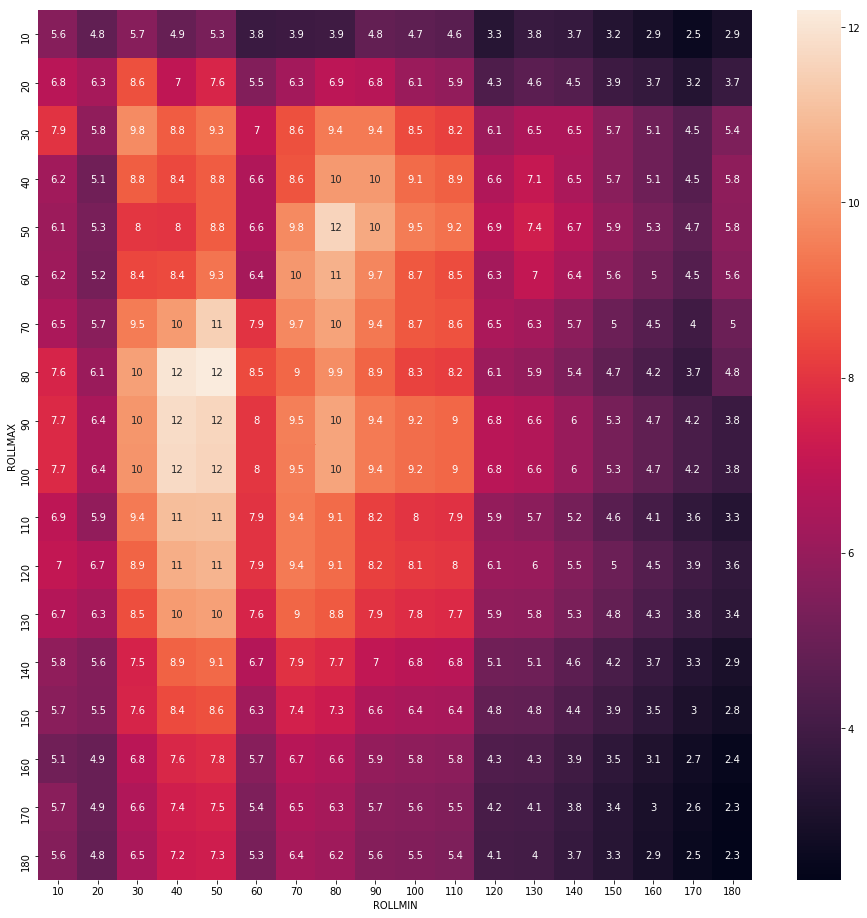

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-TT-PARAMTEST-20190227.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

196

,START,END,TURTLE_POS,ROLLMAX,ROLLMIN,ORDER,STOCK,RETURN,MAXDROPDOWN,WINRATE,annual_return,annual_volatility,calmar_ratio,sharpe_ratio,alpha,beta,ALL_DAYS,FREECASH_DAY,BENCHMARK_RETURN
0,2015-01-01,2019-04-01,1,10,10,33,1,-0.210594,-0.326905,0.363636,-0.063590,0.191620,-0.194522,-0.245143,-0.007410,0.275461,907,0,-0.532258
1,2015-01-01,2019-04-01,1,10,20,22,1,-0.311704,-0.440712,0.318182,-0.099622,0.241065,-0.226047,-0.312049,-0.023484,0.439582,897,0,-0.481712
2,2015-01-01,2019-04-01,1,10,30,16,1,-0.192901,-0.376472,0.375000,-0.059070,0.249174,-0.156903,-0.116978,-0.012757,0.579504,887,0,-0.251725
3,2015-01-01,2019-04-01,1,10,40,14,1,-0.244183,-0.408535,0.285714,-0.077293,0.230426,-0.189196,-0.231745,0.000509,0.552699,877,0,-0.399036
4,2015-01-01,2019-04-01,1,10,50,13,1,-0.329530,-0.475323,0.307692,-0.109701,0.237332,-0.230792,-0.368744,-0.039390,0.678745,867,0,-0.321914


,TURTLE_POS,ROLLMAX,ROLLMIN,ORDER,STOCK,RETURN,MAXDROPDOWN,WINRATE,annual_return,annual_volatility,calmar_ratio,sharpe_ratio,alpha,beta,ALL_DAYS,FREECASH_DAY,BENCHMARK_RETURN
count,196.0,196.000000,196.000000,196.00000,196.0,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.0,196.000000
mean,1.0,75.000000,75.000000,5.19898,1.0,-0.101504,-0.227000,0.273157,-0.034472,0.110085,-0.118818,-0.250125,-0.013944,0.222415,818.785714,0.0,-0.276120
std,0.0,40.414519,40.414519,3.81175,0.0,0.113434,0.127260,0.176175,0.039475,0.049134,0.137556,0.304828,0.031355,0.187032,33.040379,0.0,0.074027
min,1.0,10.000000,10.000000,2.00000,1.0,-0.393675,-0.516312,0.000000,-0.147294,0.025793,-0.308481,-0.857043,-0.100174,0.011874,777.000000,0.0,-0.532258
25%,1.0,40.000000,40.000000,3.00000,1.0,-0.156770,-0.321577,0.200000,-0.053136,0.074634,-0.229782,-0.510008,-0.034956,0.092809,787.000000,0.0,-0.321914
50%,1.0,75.000000,75.000000,4.00000,1.0,-0.079120,-0.187789,0.285714,-0.025410,0.093462,-0.143805,-0.245129,-0.011870,0.141376,817.000000,0.0,-0.287021
75%,1.0,110.000000,110.000000,5.25000,1.0,-0.022046,-0.150156,0.333333,-0.007181,0.147954,-0.048418,-0.027188,0.008126,0.314521,839.500000,0.0,-0.250601
max,1.0,140.000000,140.000000,33.00000,1.0,0.102935,-0.030183,1.000000,0.028552,0.249174,0.418888,0.411885,0.063655,0.742614,907.000000,0.0,-0.139109


ROLLMIN,10,20,30,40,50,60,70,80,90,100,110,120,130,140
ROLLMAX,,,,,,,,,,,,,,
10,-0.210594,-0.311704,-0.192901,-0.244183,-0.329530,-0.065206,-0.175396,-0.172810,-0.293329,-0.334325,-0.366192,-0.393675,-0.382297,-0.388168
20,0.007408,-0.146608,0.036598,0.080681,-0.073020,-0.057035,-0.168186,-0.155193,-0.253003,-0.296346,-0.330028,-0.359082,-0.360122,-0.356589
30,0.053208,0.021507,-0.000907,0.056658,-0.093628,-0.064779,-0.166770,-0.133880,-0.211238,-0.227900,-0.264859,-0.296739,-0.001913,0.009786
40,0.070255,0.013833,-0.007956,0.102935,-0.021309,-0.065215,-0.167161,-0.126269,-0.204307,-0.204307,-0.242396,-0.275250,0.028584,0.041313
50,0.032319,0.014849,-0.036173,0.071564,-0.049146,-0.091802,-0.190846,-0.203215,-0.274380,-0.274380,-0.274380,-0.305845,-0.014837,0.010866
60,-0.068583,-0.099481,-0.144755,-0.025912,-0.135639,-0.174417,-0.264451,-0.275695,-0.340384,-0.340384,-0.340384,-0.342177,-0.066404,-0.041128
70,0.049238,0.032805,0.026883,0.070470,0.028963,-0.017200,-0.064597,-0.078573,-0.078573,-0.078573,-0.078573,-0.078573,-0.078573,-0.053027
80,0.066474,0.007247,0.001472,0.043979,0.003499,-0.041521,-0.087747,-0.101375,-0.101375,-0.101375,-0.101375,-0.101375,-0.101375,-0.066778
90,0.076215,0.024644,0.037169,0.081192,0.051353,0.004187,-0.014785,-0.029504,-0.029504,-0.029504,-0.029504,-0.029504,-0.029504,-0.074540


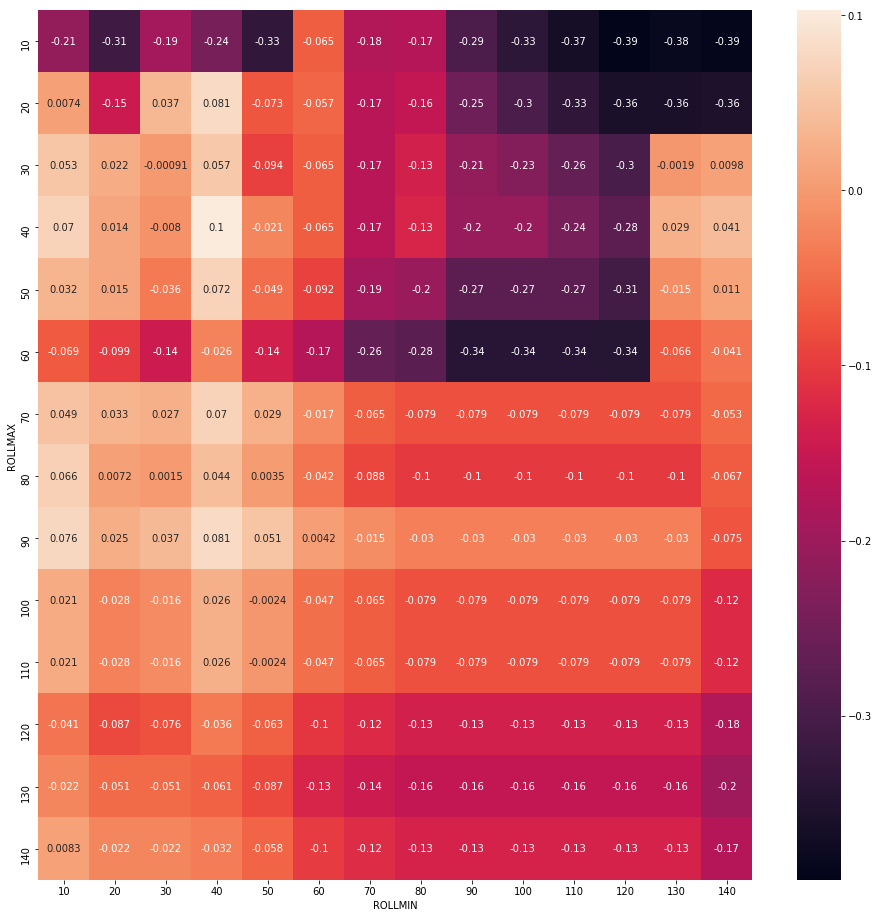

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2015-2018-512500-TT-PARAMTEST-20190303.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)